# Import dataset

In [1]:
from sklearn.preprocessing import LabelEncoder

In [1]:
import pandas as pd
df = pd.read_csv('churn_dataset.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### Penjelasan fitur
1. State: Data kategori yang menunjukkan negara bagian (sebagai tipe objek).
2. Panjang Akun: Data numerik yang mewakili panjang akun (sebagai bilangan bulat).
3. Kode Area: Data numerik yang menunjukkan kode area (sebagai bilangan bulat).
4. Paket Internasional: Data kategori yang menunjukkan apakah pengguna memiliki paket internasional (sebagai tipe objek).
5. Paket Voice Mail: Data kategori yang menunjukkan apakah pengguna memiliki paket voice mail (sebagai tipe objek).
6. Jumlah Pesan Voice Mail: Data numerik yang menunjukkan jumlah pesan voice mail (sebagai bilangan bulat).
7. Total Menit Siang: Data numerik untuk total menit yang digunakan selama siang (sebagai angka desimal).
8. Total Panggilan Siang: Data numerik untuk jumlah total panggilan yang dibuat selama siang (sebagai bilangan bulat).
9. Total Biaya Siang: Data numerik untuk biaya yang dikeluarkan untuk panggilan siang (sebagai angka desimal).
10. Total Menit Malam: Data numerik untuk total menit yang digunakan selama malam (sebagai angka desimal).
11. Total Panggilan Malam: Data numerik untuk jumlah total panggilan yang dibuat selama malam (sebagai bilangan bulat).
12. Total Biaya Malam: Data numerik untuk biaya yang dikeluarkan untuk panggilan malam (sebagai angka desimal).
13. Total Menit Malam Hari: Data numerik untuk total menit yang digunakan selama malam hari (sebagai angka desimal).
14. Total Panggilan Malam Hari: Data numerik untuk jumlah total panggilan yang dibuat selama malam hari (sebagai bilangan bulat).
15. Total Biaya Malam Hari: Data numerik untuk biaya yang dikeluarkan untuk panggilan malam hari (sebagai angka desimal).
16. Total Menit Internasional: Data numerik untuk total menit internasional yang digunakan (sebagai angka desimal).
17. Total Panggilan Internasional: Data numerik untuk jumlah total panggilan internasional yang dibuat (sebagai bilangan bulat).
18. Total Biaya Internasional: Data numerik untuk biaya yang dikeluarkan untuk panggilan internasional (sebagai angka desimal).
19. Panggilan Layanan Pelanggan: Data numerik yang menunjukkan jumlah panggilan layanan pelanggan yang dibuat (sebagai bilangan bulat).
20. Churn: Data boolean yang menunjukkan apakah pelanggan telah beralih (yaitu, meninggalkan layanan).

## Ranking Information Gain dan Correlation Attributes

In [3]:
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import pearsonr
import numpy as np

# Convert categorical columns to numeric for mutual information calculation
data_numeric = pd.get_dummies(df)

# Separating the features and the target variable
X = data_numeric.drop('Churn', axis=1)
y = data_numeric['Churn']

# Calculate the Information Gain for each feature
info_gain = mutual_info_classif(X, y)
info_gain_series = pd.Series(info_gain, index=X.columns)

# Sort the features based on Information Gain in decreasing order
info_gain_sorted = info_gain_series.sort_values(ascending=False)

# Calculate the Pearson Correlation for each feature
correlation = []
for column in X.columns:
    corr, _ = pearsonr(X[column], y)
    correlation.append(corr)

correlation_series = pd.Series(correlation, index=X.columns)

# Sort the features based on absolute correlation values in descending order
correlation_sorted = correlation_series.abs().sort_values(ascending=False)

info_gain_sorted, correlation_sorted


(Total day charge          0.054788
 Total day minutes         0.054080
 Customer service calls    0.032842
 International plan_No     0.027034
 Number vmail messages     0.015305
                             ...   
 State_MD                  0.000000
 State_MO                  0.000000
 State_MS                  0.000000
 State_ND                  0.000000
 State_MA                  0.000000
 Length: 71, dtype: float64,
 International plan_Yes    0.259852
 International plan_No     0.259852
 Customer service calls    0.208750
 Total day minutes         0.205151
 Total day charge          0.205151
                             ...   
 State_UT                  0.002543
 State_OR                  0.001710
 State_GA                  0.001179
 State_DE                  0.001019
 State_OK                  0.001019
 Length: 71, dtype: float64)

### Continue to get which original features are the most significant

In [5]:
# Filtering the original features (excluding the dummy variables created for categorical columns)
original_features = list(df.columns)
original_features.remove('Churn')  # Removing the target variable

# Recalculate Information Gain and Correlation only for original features
X_original = pd.get_dummies(df[original_features])
info_gain_original = mutual_info_classif(X_original, y)
info_gain_original_series = pd.Series(info_gain_original, index=X_original.columns)

correlation_original = []
for column in X_original.columns:
    corr, _ = pearsonr(X_original[column], y)
    correlation_original.append(corr)

correlation_original_series = pd.Series(correlation_original, index=X_original.columns)

# Aggregate the scores for the original features (summing up scores for dummy variables of each categorical feature)
def aggregate_scores(scores_series):
    aggregated_scores = {}
    for feature in original_features:
        if df[feature].dtype == 'O':  # Categorical feature
            # Sum up scores for all dummy variables of this feature
            feature_score = scores_series.filter(like=feature + '_').sum()
        else:
            feature_score = scores_series[feature]
        aggregated_scores[feature] = feature_score
    return pd.Series(aggregated_scores).sort_values(ascending=False)

# Aggregate Information Gain and Correlation Scores
aggregated_info_gain = aggregate_scores(info_gain_original_series)
aggregated_correlation = aggregate_scores(correlation_original_series.abs())

aggregated_info_gain, aggregated_correlation


(State                     0.100183
 Total day minutes         0.056381
 Total day charge          0.053300
 International plan        0.050123
 Customer service calls    0.038655
 Voice mail plan           0.024059
 Number vmail messages     0.016052
 Total day calls           0.010907
 Total intl calls          0.002891
 Total night calls         0.002563
 Total eve calls           0.002243
 Account length            0.001370
 Total night charge        0.000157
 Total eve minutes         0.000143
 Area code                 0.000000
 Total eve charge          0.000000
 Total night minutes       0.000000
 Total intl minutes        0.000000
 Total intl charge         0.000000
 dtype: float64,
 State                     0.960146
 International plan        0.519704
 Customer service calls    0.208750
 Total day minutes         0.205151
 Total day charge          0.205151
 Voice mail plan           0.204296
 Total eve minutes         0.092796
 Total eve charge          0.092786
 Number vma

## String to numeric value

In [4]:
df = df.replace({True: 1, False: 0})
df = df.replace({'Yes': 1, 'No': 0})
# Convert state abbreviations to numerical values
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [5]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## Normalisasi

**Normalisasi data dengan Z-score**
$$ X(stand) = \frac{x - mean (x)}{std_\text{dev}} $$
dimana $${mean = 0}, {std_\text{dev}} = 1 $$

In [6]:
def normalize(data, i):
    # Initialize a list to store the means of each column
    means = [0] * i
    # Initialize a list to store the standard deviations of each column
    stds = [1] * i
    # Loop through the columns
    for j in range(i):
        # Compute the mean of the column
        mean = data.iloc[:, j].mean()
        # Compute the standard deviation of the column
        std = data.iloc[:, j].std()
        # Store the mean and standard deviation
        means[j] = mean
        stds[j] = std
    # Loop through the rows
    for index in data.index:
        # Loop through the columns
        for j in range(i):
            # Normalize the value by subtracting the mean and dividing by the standard deviation
            data.loc[index, data.columns[j]] = (data.loc[index, data.columns[j]] - means[j]) / stds[j]
    # Return the normalized data
    return data


In [7]:
# Get data needs to be normalized
features_to_norm = ['Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls']
normalized = df [features_to_norm]
i = normalized.shape[1]
normalized = normalize(normalized,i)
print(normalized)
# Put it back to df
df = df.drop(features_to_norm, axis=1)
df = pd.concat([df, normalized], axis=1)

C:\Users\Michael\AppData\Local\Temp\ipykernel_14164\1167225100.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4765716430729889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, data.columns[j]] = (data.loc[index, data.columns[j]] - means[j]) / stds[j]
C:\Users\Michael\AppData\Local\Temp\ipykernel_14164\1167225100.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.05593195749567613' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, data.columns[j]] = (data.loc[index, data.columns[j]] - means[j]) / stds[j]
C:\Users\Michael\AppData\Local\Temp\ipykernel_14164\1167225100.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.4654245281314051' has dtype inc

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              1.566532         0.476572          1.566801          -0.070599   
1             -0.333688         1.124334         -0.333963          -0.108064   
2              1.168128         0.675883          1.168289          -1.573147   
3              2.196267        -1.466716          2.196429          -2.742453   
4             -0.240054         0.626055         -0.240005          -1.038776   
...                 ...              ...               ...                ...   
3328          -0.432830        -1.167749         -0.433321           0.286305   
3329           0.942305        -2.164306          0.942573          -0.938212   
3330           0.018817         0.426744          0.019190           1.731670   
3331           0.624684         0.227432          0.625059          -0.815958   
3332           1.002892         0.626055          1.003052           1.280117   

      Total eve calls  Tota

In [8]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Churn,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,128,415,0,1,25,0,1.566532,0.476572,1.566801,-0.070599,-0.055932,-0.070416,0.866613,-0.465425,0.865899,-0.084995,-0.601105,-0.085678,-0.427868
1,35,107,415,0,1,26,0,-0.333688,1.124334,-0.333963,-0.108064,0.144845,-0.107533,1.058412,0.147802,1.059231,1.240296,-0.601105,1.240982,-0.427868
2,31,137,415,0,0,0,0,1.168128,0.675883,1.168289,-1.573147,0.496204,-1.573664,-0.756756,0.198905,-0.755457,0.703015,0.211502,0.697052,-1.188040
3,35,84,408,1,0,0,0,2.196267,-1.466716,2.196429,-2.742453,-0.608068,-2.742856,-0.078539,-0.567629,-0.078794,-1.302831,1.024109,-1.306205,0.332305
4,36,75,415,1,0,0,0,-0.240054,0.626055,-0.240005,-1.038776,1.098534,-1.037784,-0.276270,1.067643,-0.276520,-0.049177,-0.601105,-0.045878,1.092477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,0,-0.432830,-1.167749,-0.433321,0.286305,1.299311,0.286837,1.546807,-0.874243,1.546956,-0.120814,0.617806,-0.125477,0.332305
3329,49,68,415,0,0,0,0,0.942305,-2.164306,0.942573,-0.938212,-2.264476,-0.938031,-0.189269,1.169848,-0.188642,-0.228270,-0.194801,-0.231610,1.092477
3330,39,28,510,0,0,0,0,0.018817,0.426744,0.019190,1.731670,-2.113894,1.732089,-0.177405,-0.465425,-0.175460,1.383570,0.617806,1.386915,0.332305
3331,6,184,510,1,0,0,0,0.624684,0.227432,0.625059,-0.815958,-0.808845,-0.815080,-1.219445,1.885279,-1.221213,-1.875929,2.243020,-1.876669,0.332305


Setelah data dinormalisasi, selanjutnya ialah PCA

- menghitung covariance matrix
$$
        Cov (\sum) = \begin{pmatrix}
        cov (x_1,x_1) & cov(x_1,x_2) & ... & cov(x_1,x_m) \\
        | & | & | & | \\
        cov (x_m,x_1) & cov(x_m,x_2) & ... & cov(x_m,x_m)
        \end{pmatrix}
$$
  di mana \(X\) adalah matriks data yang memiliki dimensi \(n x m\), dengan \(n\) adalah jumlah sampel dan \(m\) adalah jumlah fitur.
- menghitung eigenvalue dan eigenvector
$$ AX = λX $$

In [9]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd

# Define a function to do a PCA
def do_pca(data, n_components):
  # data: a numpy array of shape (n_samples, n_features)
  # n_components: an integer specifying the number of principal components to keep
  # returns: a numpy array of shape (n_samples, n_components) containing the projected data

  # Calculate the covariance matrix of the data
  cov_matrix = np.cov(data.T)

  # Calculate the eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Select the first n_components eigenvectors as the principal components
  pc = eigenvectors[:, :n_components]

  # Project the data onto the principal components
  transformed_data = np.dot(data, pc)

  # Return the transformed data
  return transformed_data


# DNN

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Split the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=len(X.columns), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 3.2691 - accuracy: 0.7093 - val_loss: 0.8904 - val_accuracy: 0.7946
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.8087 - val_loss: 0.5106 - val_accuracy: 0.8276
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8436 - val_loss: 0.4607 - val_accuracy: 0.8501
Epoch 4/100
84/84 [==============================] - 0s 987us/step - loss: 0.4311 - accuracy: 0.8515 - val_loss: 0.4128 - val_accuracy: 0.8486
Epoch 5/100
84/84 [==============================] - 0s 983us/step - loss: 0.4130 - accuracy: 0.8545 - val_loss: 0.4658 - val_accuracy: 0.8576
Epoch 6/100
84/84 [==============================] - 0s 998us/step - loss: 0.3963 - accuracy: 0.8556 - val_loss: 0.3945 - val_accuracy: 0.8486
Epoch 7/100
84/84 [==============================] - 0s 975us/step - loss: 0.3897 - accuracy: 0.8567 - val_loss: 0.3844 - val_accuracy: 0.8501
Epoch

Training Accuracy: 0.9039760231971741
Training Loss: 0.26045581698417664
Validation Accuracy: 0.9175412058830261
Validation Loss: 0.23648695647716522


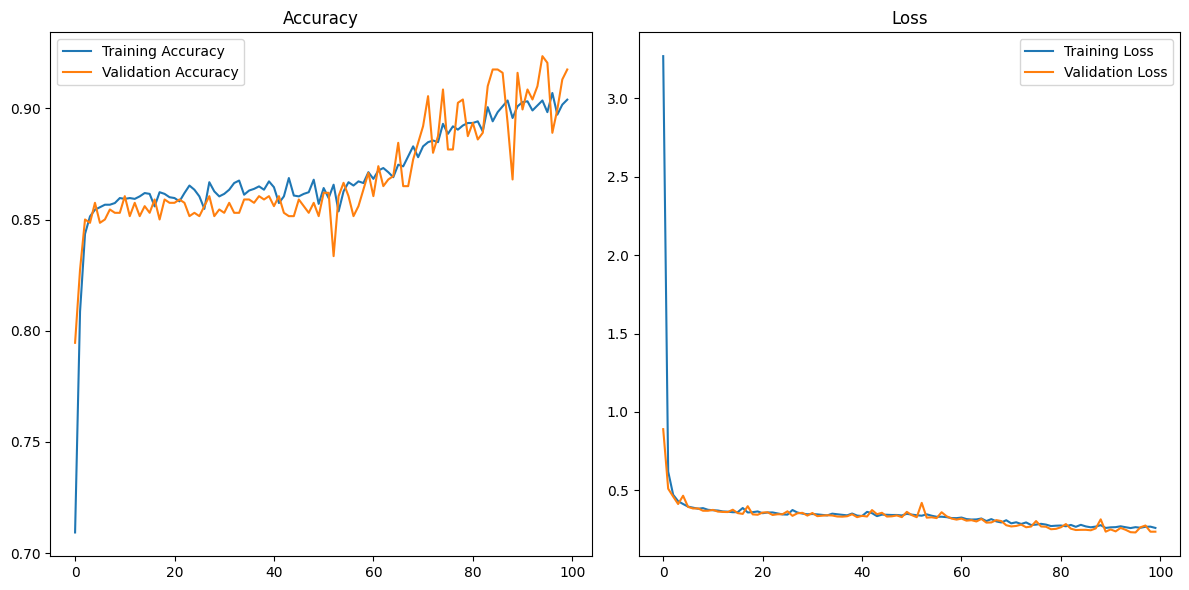

In [14]:
import matplotlib.pyplot as plt

# Print the accuracy and loss
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {train_acc[-1]}')
print(f'Training Loss: {train_loss[-1]}')
print(f'Validation Accuracy: {val_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]}')

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
